In [2]:
#pip install tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

C:\Users\Bindhu_alia\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Linear model.......
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy with linear activation: 0.86
Training relu model.......
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy with relu activation: 0.865

 Visualizing decision boundaries
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


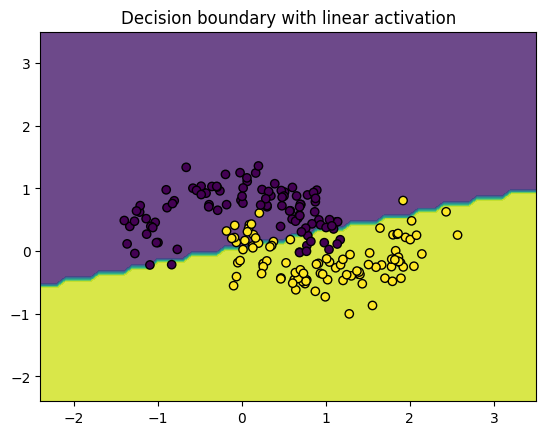

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


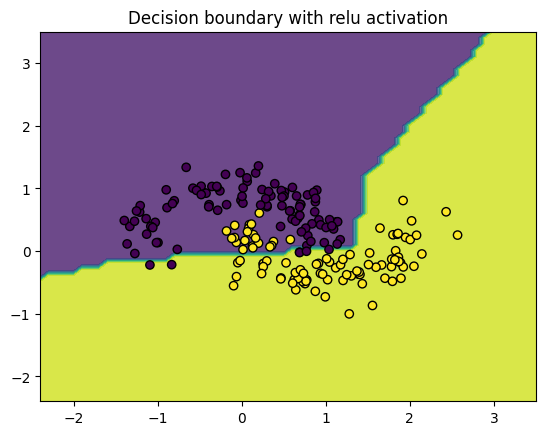

In [11]:
#Generating synthetic dataset

X,y = make_moons(n_samples=1000, noise=0.2, random_state=42)

y = y.reshape(-1,1) #reshape for consistency

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build a sequential model with linear activation
def build_linear_model():

    model = Sequential([
        Dense(4, activation='linear', input_dim = 2), #first layer with linear activation
        Dense(1, activation='sigmoid')#output layer for binary classification
    ])
    model.compile(optimizer = Adam(learning_rate=0.2), loss='binary_crossentropy',metrics = ['accuracy'])
    return model

#Build a sequential model with Relu activation
def build_relu_model():
    model = Sequential([
        Dense(4, activation='relu', input_dim=2),#first layer with relu activation
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.2), loss = 'binary_crossentropy',metrics=['accuracy'])
    return model

#training and evaluating the models
def train_and_evaluate(model, X_train, X_test, Y_train, Y_test, epochs =50, batch_size=32):
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size , verbose=0)
    ypred = (model.predict(X_test)>0.5).astype(int)

    accuracy = accuracy_score(Y_test, ypred)
    return accuracy, ypred

#Initialize models
linear_model= build_linear_model()
relu_model = build_relu_model()

#train and evaluate linear model
print('Training Linear model.......')
linear_accuracy, linear_preds = train_and_evaluate(linear_model, X_train, X_test, Y_train, Y_test)
print(f'Accuracy with linear activation: {linear_accuracy}')

#train and evaluate relu model
print('Training relu model.......')
relu_accuracy, relu_preds = train_and_evaluate(relu_model, X_train, X_test, Y_train, Y_test)
print(f'Accuracy with relu activation: {relu_accuracy}')

#visualizing the boundaries

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() -1,X[:,0].max() +1 
    y_min, y_max = X[:,0].min() -1,X[:,0].max() +1 

    xx , yy = np.meshgrid(np.arange(x_min,x_max, 0.1),np.arange(y_min,y_max,0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]

    Z =  model.predict(grid)
    Z = (Z>0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0],X[:,1],c=y.flatten(), edgecolor = 'k')
    plt.title(title)
    plt.show()
    
#plot decision boundaries

print('\n Visualizing decision boundaries')
plot_decision_boundary(linear_model, X_test, Y_test, 'Decision boundary with linear activation')
plot_decision_boundary(relu_model, X_test, Y_test, 'Decision boundary with relu activation')